### Exercise 5.3
PH 295  
Nick Ball  
**Purpose:**
Program that calculates the integral of a given function from 0 to 3 in steps of 0.1 and 
creates a graph of the given function.

$$
E(x) = \int_{0}^{x} e^{-x^{2}}dx
$$

a) Write a program to calculate $E(x)$ for values of x from 0 to 3 in steps of 0.1

In [4]:
#Import Libraries
import matplotlib.pyplot as plt
import math
from numpy import *

In [9]:
#Define Simpson's Integration
def simpson(f,N):
    if N%2 !=0: 
        N += 1 # must have an even number of slices
    h = (b-a)/N
    I = f(a)+f(b)

    #Sum of k odd
    for k in range(1,int(N/2)+1):     
        I += 4*(f(a+(2*k-1)*h))

    #Sum of k even
    for k in range(1,int(N/2)):
        I += 2*(f(a+2*k*h))
    
    #Multiply end result by h/3
    return I*(h/3)

In [14]:
#Define constans/variables
area = list()           #not sure if we need to initialize lists
dx = 0.1
a = 0
N = 1000
x = arange(a,3,0.1)

def f(x):
    return math.e**(-x**2)

for b in x:
    area.append(simpson(f,N))

b) Once your program is running, make a graph of the function $E(x)$

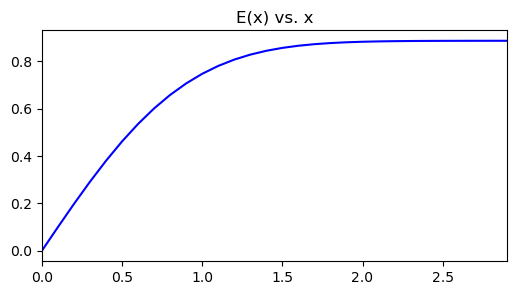

In [15]:
plt.figure(figsize=(6,3))
plt.title("E(x) vs. x")
plt.plot(x,area,color='blue')
plt.xlim(x[0],x[-1])
plt.show()

**Conclusion:**
There are a few interesting I learned from this exercise. 
1) There's an html page of someone who has done most of the assignments for this class here at [here](https://sashabakker.github.io/). I don't plan on using it extensively (if at all) since I do not understand most of the code. Some of it I used for this section because the simplification of the code is something wonderful to behold. 
  
2) You can actually pass functions into other functions as a "variable" of sorts. I do not understand the full details of this, but thanks to Sasha Bakker, I now know you can define a function and pass it into any integration method you import or have on hand. I plan to use this in the future for making a integration library that I can reference (because why not). 
  
3) Below I have posted the code of Sasha's Simon's Method. This was by far the most interesting discovery as it uses a weighted calculation to produce the results indstead of a for loop for the summation. I am still not entirely sure as to how it works, but it was something cool to behold nontheless.

In [17]:
"""
Note: This code belongs to Sasha Bakker, not myself. I used some of it as reference to make the simpson's 
Method more robust than my own (see below), but otherwise used my own code. The usage of the weights here
is something I don't understand at all, but would love to.
"""

def simpson(f,N):
    if N%2 !=0:# I used this error handling as is takes care of cases when N
        N += 1 # is not even, something I didn't account for

    h = (b-a)/N
    x = linspace(a,b,N+1) # number of points is number of slices + 1

    weight = 4*ones(N+1) 
    weight[::2] = 2
    weight[0] = 1
    weight[-1] = 1

    return ((h/3)*sum(weight*f(x)),N)    #How on earth does this work?